In [1]:
# 1.Use world dataset containing socio-economic variables (features) of different countries 
# and corresponding development_status as outcome (label).
# 2.Employ forward wrapper method to select best three features from the dataset.
# 3.Use a PCA model to create three new components from existing features.
# 4.Explain each PC (new features) based on the correlations with old features.
# 5.Use a LDA model to create two new components from existing features.
# 6.Compare the accuracy of KNN classifiers (K=9) trained on each set of features obtained 
# using forward, PCA and LDA methods.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

train_data = pd.read_csv('world_ds.csv')
train_data.head(5)


,Country,Birth Rate,Co2-Emissions,Fertility Rate,Gasoline Price,GDP,Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Physicians per thousand,Population,Unemployment rate,development_status
0,Afghanistan,32.49,8672.0,4.47,0.70,1.910135e+10,47.9,64.5,638.0,0.43,0.28,38041754,11.120000,1
1,Albania,11.78,4536.0,1.62,1.36,1.527808e+10,7.8,78.5,15.0,1.12,1.20,2854191,12.330000,2
2,Algeria,24.28,150006.0,3.02,0.28,1.700000e+11,20.1,76.7,112.0,0.95,1.72,43053054,11.700000,2
3,Angola,40.73,34693.0,5.52,0.97,9.463542e+10,51.6,60.8,241.0,0.71,0.21,31825295,6.890000,2
4,Antigua and Barbuda,15.33,557.0,1.99,0.99,1.727759e+09,5.0,76.9,42.0,3.04,2.76,97118,6.895052,3


In [2]:
# data processing
# drop country column and separate features and label
x_data = train_data.drop(columns=['Country', 'development_status'])
y_data = train_data['development_status']
#print(x_data.info())


In [3]:
KNN = KNeighborsClassifier(n_neighbors=9)
# Forward Wrapper Method using through mlxtend library
# using accuracy as scoring metric and 5-fold cross-validation
selector = SFS(KNN, k_features=3, forward=True, floating=False, scoring='accuracy', cv=5)
selector = selector.fit(x_data, y_data)
selected_features = list(selector.k_feature_names_)
print('select best three features from the dataset:', selected_features)

select best three features from the dataset: ['Fertility Rate', 'Minimum wage', 'Physicians per thousand']


In [4]:
# 3.Use a PCA model to create three new components from existing features.
# standardize the dataSet before using PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)
# use PCA
pca = PCA(n_components=3)
# transform the scaled data to new three components dimension space
x_pca = pca.fit_transform(x_scaled)
print('three new components from existing features:', pca.explained_variance_ratio_)

three new components from existing features: [0.46187799 0.21175161 0.10063814]


PCA loading matrix:
                                PC1       PC2       PC3
Birth Rate               -0.950798  0.040543  0.114678
Co2-Emissions             0.211857  0.961682  0.027797
Fertility Rate           -0.925344  0.043639  0.198600
Gasoline Price            0.270116 -0.172574  0.714837
GDP                       0.261209  0.883845  0.093436
Infant mortality         -0.939345  0.083243  0.131469
Life expectancy           0.956939 -0.083788  0.015174
Maternal mortality ratio -0.854603  0.071925  0.245195
Minimum wage              0.672041 -0.073660  0.489464
Physicians per thousand   0.799476 -0.138750  0.071915
Population                0.081068  0.878310  0.025992
Unemployment rate         0.001060  0.005983 -0.563888


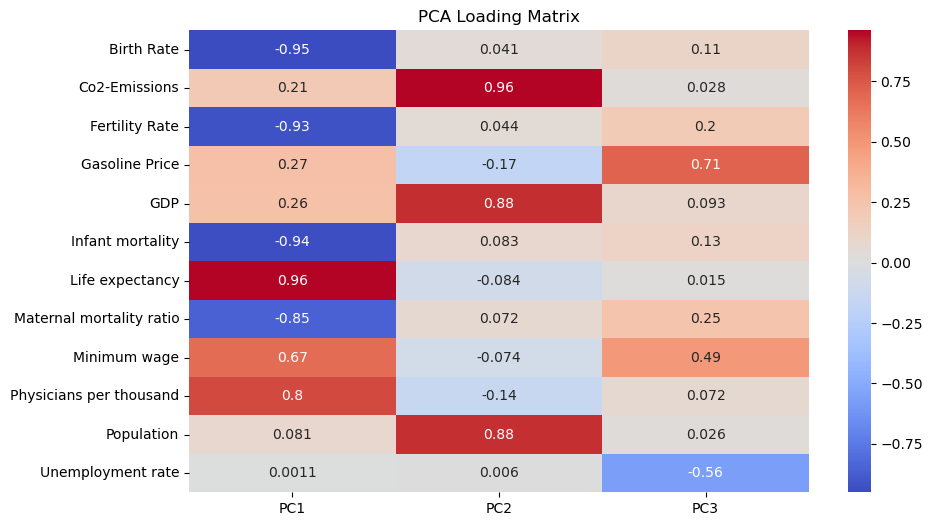

In [5]:
#4.Explain each PC (new features) based on the correlations with old features.
# we get the loading matrix from PCA and process it
loading_data = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loading_data, columns=['PC1', 'PC2', 'PC3'], index=x_data.columns)
print('PCA loading matrix:\n', loading_matrix)
# visualize the loading matrix
plt.figure(figsize=(10, 6))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm')
plt.title('PCA Loading Matrix')
plt.show()

explained variance ratio of LDA components: [0.83065759 0.16934241]


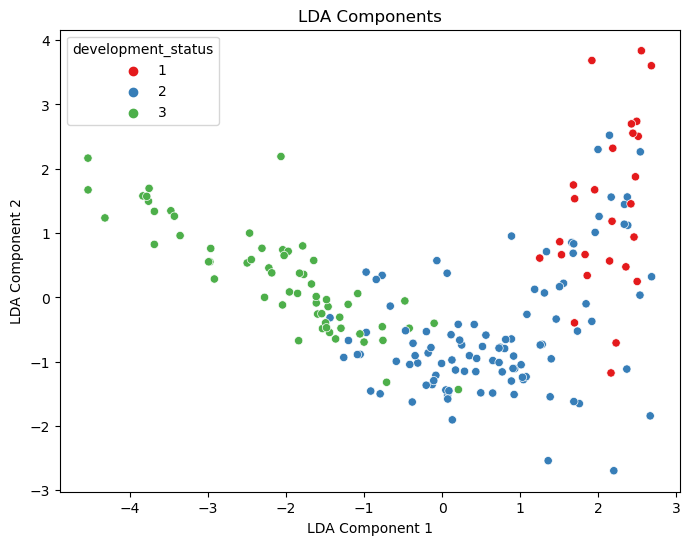

In [6]:
# 5 Use a LDA model to create two new components from existing features.
# LDA Linear Discriminant Analysis require the label to be encoded
# some y_data may be string type or other type
# we need convert them to number type
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_data)
# initialize LDA model two new components
lda = LDA(n_components=2)
x_lda = lda.fit_transform(x_scaled, y_encoded)
print('explained variance ratio of LDA components:', lda.explained_variance_ratio_)
# visualize the LDA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_lda[:, 0], y=x_lda[:, 1],
                hue=y_data, palette='Set1')
plt.title('LDA Components')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()


In [7]:
# 6.Compare the accuracy of KNN classifiers (K=9) trained 
# on each set of features obtained using forward, PCA and LDA methods.
# Split the dataset into training and testing sets
# forward_data is our selected best features
x_forward_data = x_data[selected_features].values
# split the data 80% AND 20%
x_train_fwd, x_test_fwd, y_train, y_test = train_test_split(
    x_forward_data, y_data, test_size=0.2, random_state=42)
x_train_pca, x_test_pca, _, _ = train_test_split(
    x_pca, y_data, test_size=0.2, random_state=42)
x_train_lda, x_test_lda, _, _ = train_test_split(
    x_lda, y_data, test_size=0.2, random_state=42)
# Train and evaluate KNN on forward selected features
KNN.fit(x_train_fwd, y_train)
y_pred_fwd = KNN.predict(x_test_fwd)
acc_fwd = accuracy_score(y_test, y_pred_fwd)
print('KNN accuracy with forward selected features:', acc_fwd)
# Train and evaluate KNN on PCA components
KNN.fit(x_train_pca, y_train)
y_pred_pca = KNN.predict(x_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print('KNN accuracy with PCA components:', acc_pca)
# Train and evaluate KNN on LDA components
KNN.fit(x_train_lda, y_train)
y_pred_lda = KNN.predict(x_test_lda)
acc_lda = accuracy_score(y_test, y_pred_lda)
print('KNN accuracy with LDA components:', acc_lda)

print("The best accuracy is:", max(acc_fwd, acc_pca, acc_lda))

# I repeat to use KNN with k = 9
# sometimes people will define KNN each time before use it


KNN accuracy with forward selected features: 0.7631578947368421
KNN accuracy with PCA components: 0.7894736842105263
KNN accuracy with LDA components: 0.7894736842105263
The best accuracy is: 0.7894736842105263
